### Entrega: Regresion lineal

Omar Damian Piuselli - damianpiuselli@gmail.com

$ X_1, X_2, X_3 \sim  N(0,1) $ y $ Z \sim  N(0,0.25) $

$ Y = 3X_1 + 2X_2 + X_3 + Z $

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (10, 5)

### Regresion lineal y distribucion de los coeficientes de regresion.

In [ ]:
# 1) Genero 100 muestras de la distribucion y grafico Y vs X_i
X1 = st.norm.rvs(loc=0, scale=1, size=100)
X2 = st.norm.rvs(loc=0, scale=1, size=100)
X3 = st.norm.rvs(loc=0, scale=1, size=100)
Z = st.norm(scale=0.25**0.5).rvs(size=100)

Y = 3 * X1 + 2 * X2 + 1 * X3 + Z

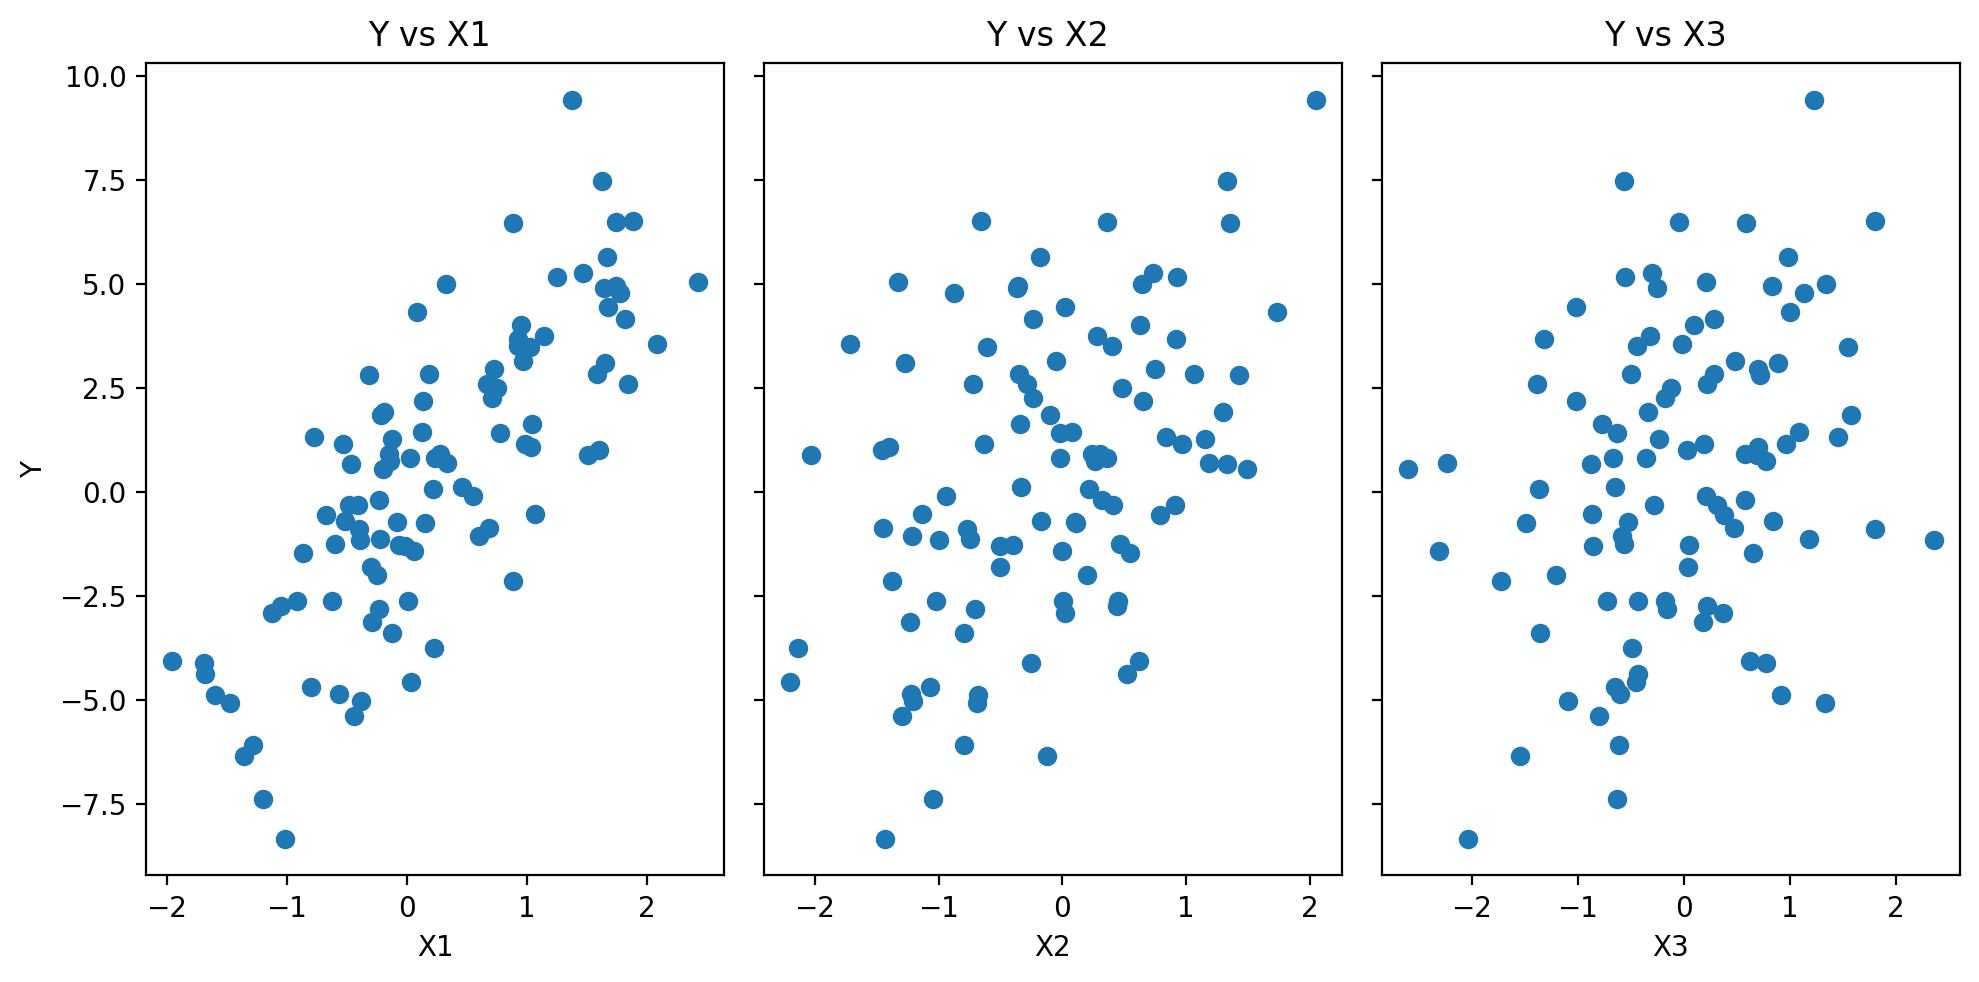

In [ ]:
_, axs = plt.subplots(1, 3, squeeze=True, sharey=True)

for x, ax, name in zip([X1, X2, X3], axs, ["X1", "X2", "X3"]):
    ax.scatter(
        x,
        Y,
    )
    ax.set_xlabel(f"{name}")
    ax.set_title(f"Y vs {name} ")
axs[0].set_ylabel("Y")

plt.tight_layout()

In [ ]:
# 2) ajusta una regresion lineal y calcular B_hat

X = np.column_stack([np.ones(100), X1, X2, X3])  # matriz de diseño dim(100, 4)
B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # B_hat = pseudoinversa @ transpuesta @ Y
print(f"B_hat = {B_hat}")

B_hat = [-0.02797259  3.04641361  2.06153424  0.97095969]


In [ ]:
# 3) repetir 1 y 2, N veces y observar distribuciones de los B_hat

N = 1000

B_hats = np.zeros((N, 4))

for i in range(N):
    X1 = st.norm.rvs(loc=0, scale=1, size=100)
    X2 = st.norm.rvs(loc=0, scale=1, size=100)
    X3 = st.norm.rvs(loc=0, scale=1, size=100)
    Z = st.norm(scale=0.25**0.5).rvs(size=100)

    Y = 3 * X1 + 2 * X2 + 1 * X3 + Z

    X = np.column_stack([np.ones(100), X1, X2, X3])
    B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y

    B_hats[i] = B_hat

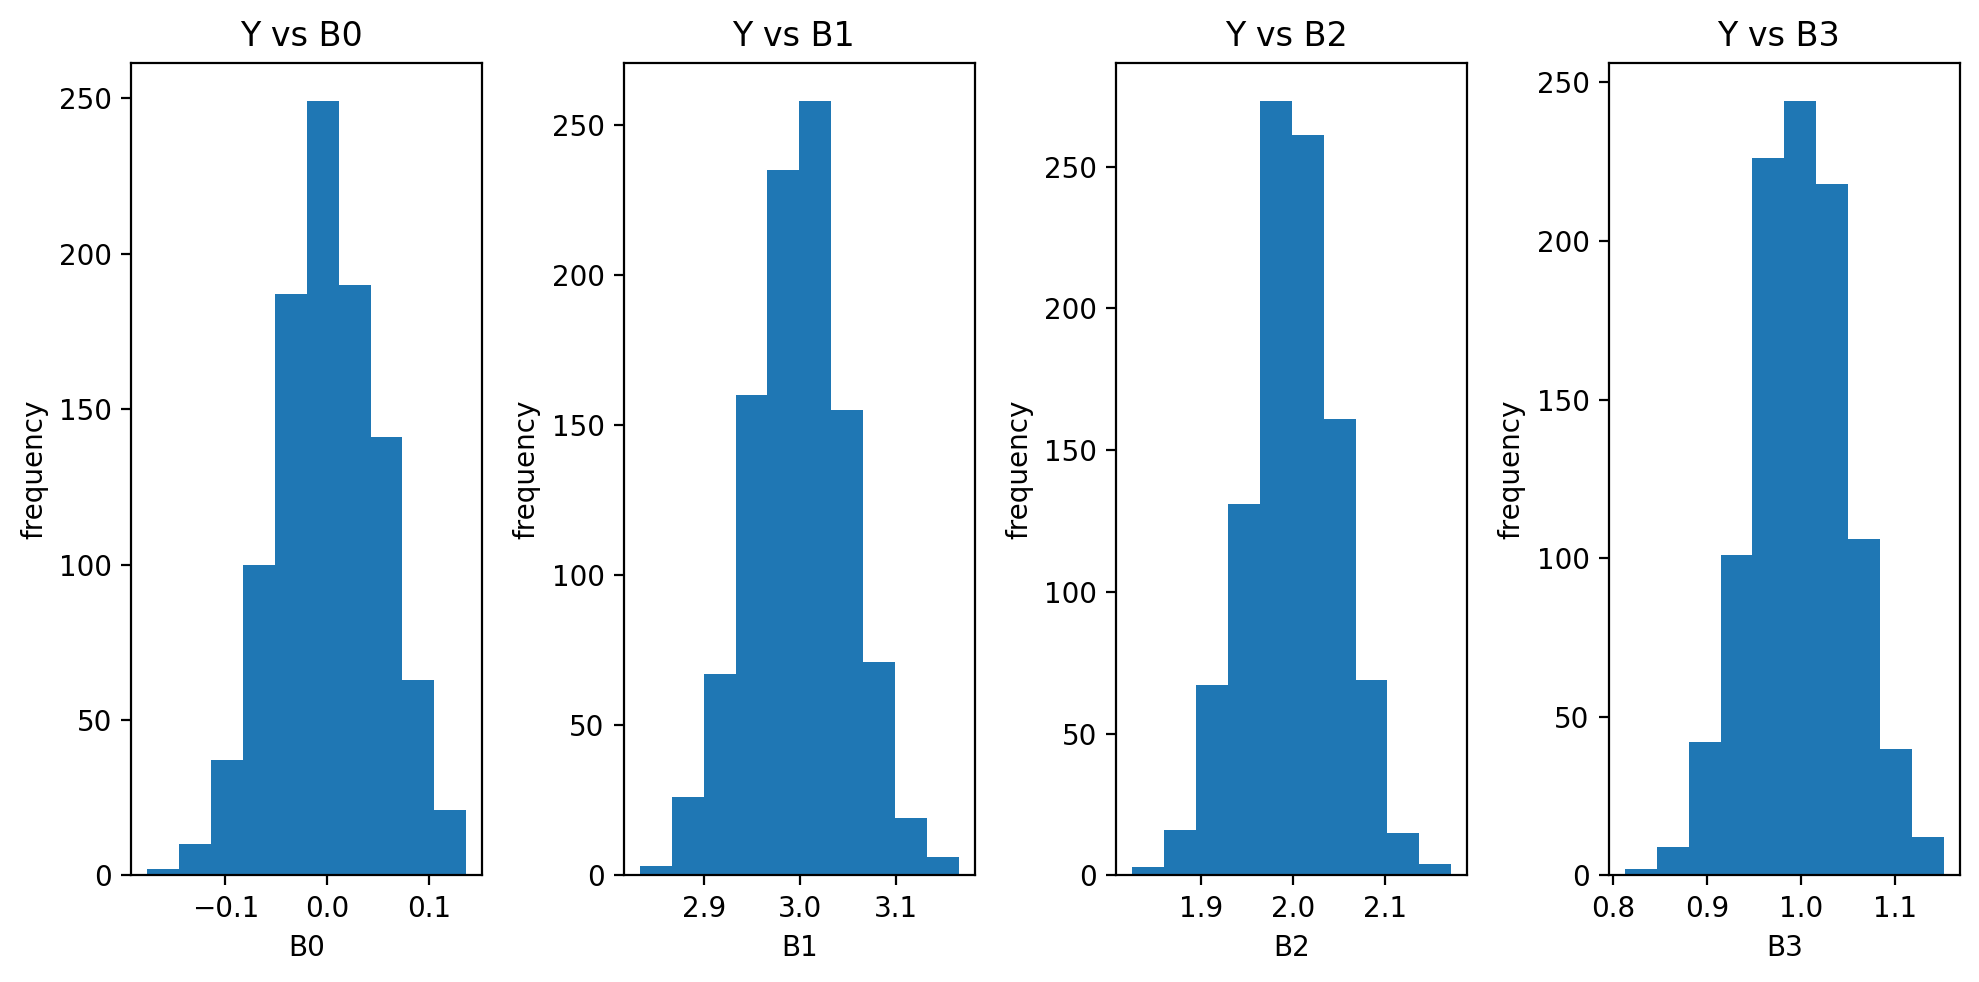

In [ ]:
_, axs = plt.subplots(1, 4, squeeze=True)

for x, ax, name in zip(B_hats.T, axs, ["B0", "B1", "B2", "B3"]):
    ax.hist(x)
    ax.set_xlabel(f"{name}")
    ax.set_title(f"Y vs {name} ")
    ax.set_ylabel("frequency")

plt.tight_layout()

In [ ]:
# 4) calculo matriz de covarianza de los B_hat
_centered_B = B_hats - B_hats.mean(axis=0)
cov_matrix = (_centered_B.T @ _centered_B) * (1 / (N - 1))

print(f"Matriz de covarianza de B_hat: \n{cov_matrix}")

Matriz de covarianza de B_hat: 
[[ 2.62875595e-03  6.84418524e-05  1.68231986e-05  6.44465441e-07]
 [ 6.84418524e-05  2.60877140e-03  3.80838222e-05 -1.42667289e-05]
 [ 1.68231986e-05  3.80838222e-05  2.53723526e-03  2.15323863e-05]
 [ 6.44465441e-07 -1.42667289e-05  2.15323863e-05  2.65319306e-03]]


In [ ]:
# 5) calculo matriz de covarianza de los B_i
poblational_cov_matrix = np.linalg.inv((X.T @ X)) * (0.25)
print(f"Matriz de covarianza de B_i: \n{poblational_cov_matrix}")

Matriz de covarianza de B_i: 
[[ 2.58547370e-03 -4.95656741e-04 -1.58569647e-04  2.63166091e-06]
 [-4.95656741e-04  3.22542426e-03  6.14266456e-05  2.61192818e-05]
 [-1.58569647e-04  6.14266456e-05  2.39331710e-03 -2.86674876e-05]
 [ 2.63166091e-06  2.61192818e-05 -2.86674876e-05  2.82846207e-03]]


C:\Users\Damm\AppData\Local\Temp\ipykernel_540\2055654627.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels([""] + ["B0", "B1", "B2", "B3"])
C:\Users\Damm\AppData\Local\Temp\ipykernel_540\2055654627.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels([""] + ["B0", "B1", "B2", "B3"])


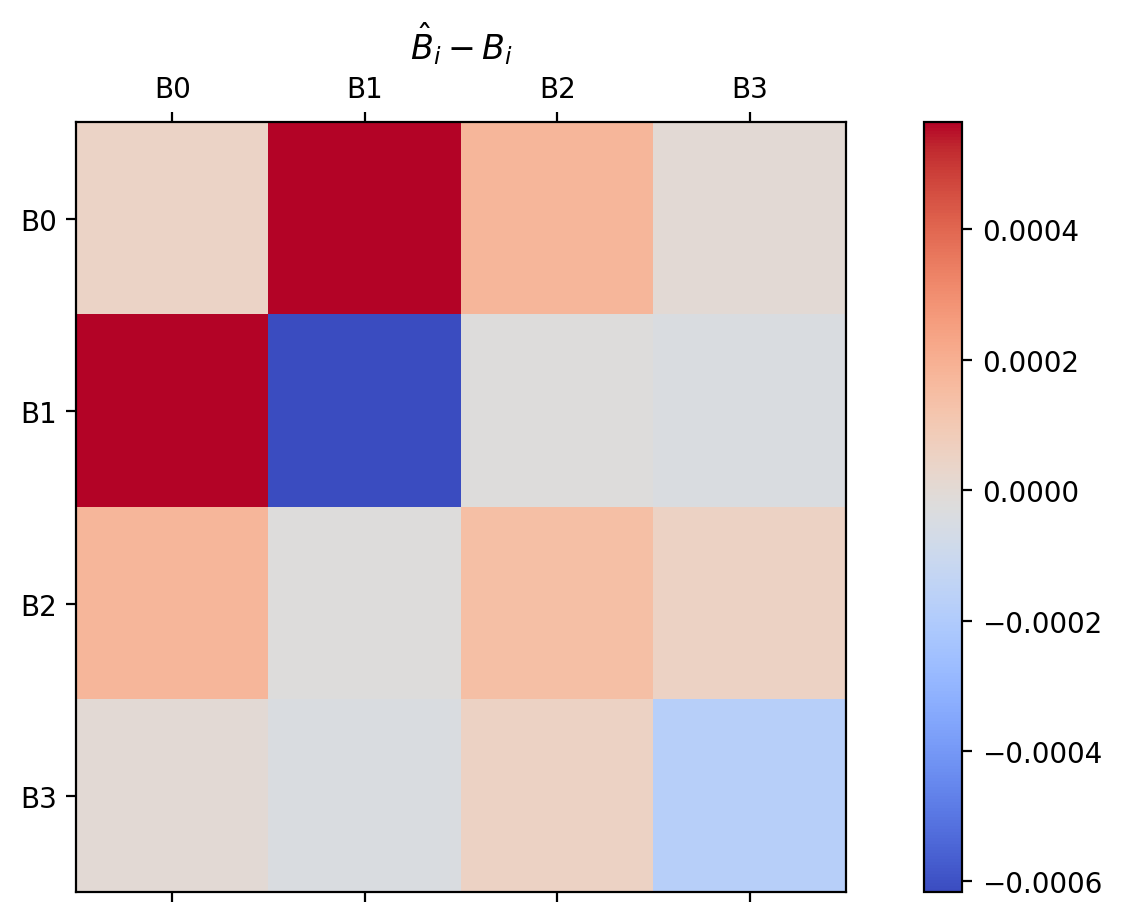

In [ ]:
# diferencia entre las estimaciones de la matriz de covarianza.


fig, ax = plt.subplots()
cax = ax.matshow(cov_matrix - poblational_cov_matrix, cmap="coolwarm")
fig.colorbar(cax)
ax.xaxis.set_ticklabels([""] + ["B0", "B1", "B2", "B3"])
ax.yaxis.set_ticklabels([""] + ["B0", "B1", "B2", "B3"])

plt.title("$ \hat{B}_i - B_i $")
plt.show()

## OBS, todos los valores son practicamente cero. Correspondencia entre los valores estimados de la muestra de parametros y los valores poblacionales.

### Ejercicio 5 de la practica.

In [ ]:
import pandas as pd

# Levanto los datos de auto-mpg.data
data = pd.read_csv("auto+mpg/auto-mpg.data", header=None, delim_whitespace=True)

In [ ]:
data.columns = [
    "mpg",
    "cylinders",
    "displacement",
    "horsepower",
    "weight",
    "acceleration",
    "model_year",
    "origin",
    "car_name",
]

In [ ]:
# Drop missings en horsepower.
mask = data["horsepower"] == "?"
data = data[~mask]

# Convierto a numerico horsepower
data["horsepower"] = data["horsepower"].astype(float)

# Dropeo variables categoricas
data = data.drop(["car_name", "origin", "model_year", "cylinders"], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   displacement  392 non-null    float64
 2   horsepower    392 non-null    float64
 3   weight        392 non-null    float64
 4   acceleration  392 non-null    float64
dtypes: float64(5)
memory usage: 18.4 KB


In [ ]:
Y = data["mpg"].values
X = data.drop("mpg", axis=1).values

In [ ]:
X = np.column_stack([np.ones(len(data)), X])  # matriz de diseño

B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # B_hat = pseudoinversa @ transpuesta @ Y
R2 = 1 - ((Y - X @ B_hat).T @ (Y - X @ B_hat)) / ((Y - Y.mean()).T @ (Y - Y.mean()))

In [ ]:
coefs = ["B0", "B1", "B2", "B3", "B4"]
vars = ["const", "displacement", "horsepower", "weight", "acceleration"]

for var_name, coef_name, coef in zip(vars, coefs, B_hat):
    print(f"{var_name}: {coef_name} = {coef:.4f}")

print(f"R2 = {R2:.4f}")
# OBS: todas las variables tienen el efecto esperado de disminuir la eficiencia de uso de combustible (mpg) al aumentar su valor.

const: B0 = 45.2511
displacement: B1 = -0.0060
horsepower: B2 = -0.0436
weight: B3 = -0.0053
acceleration: B4 = -0.0231
R2 = 0.7070


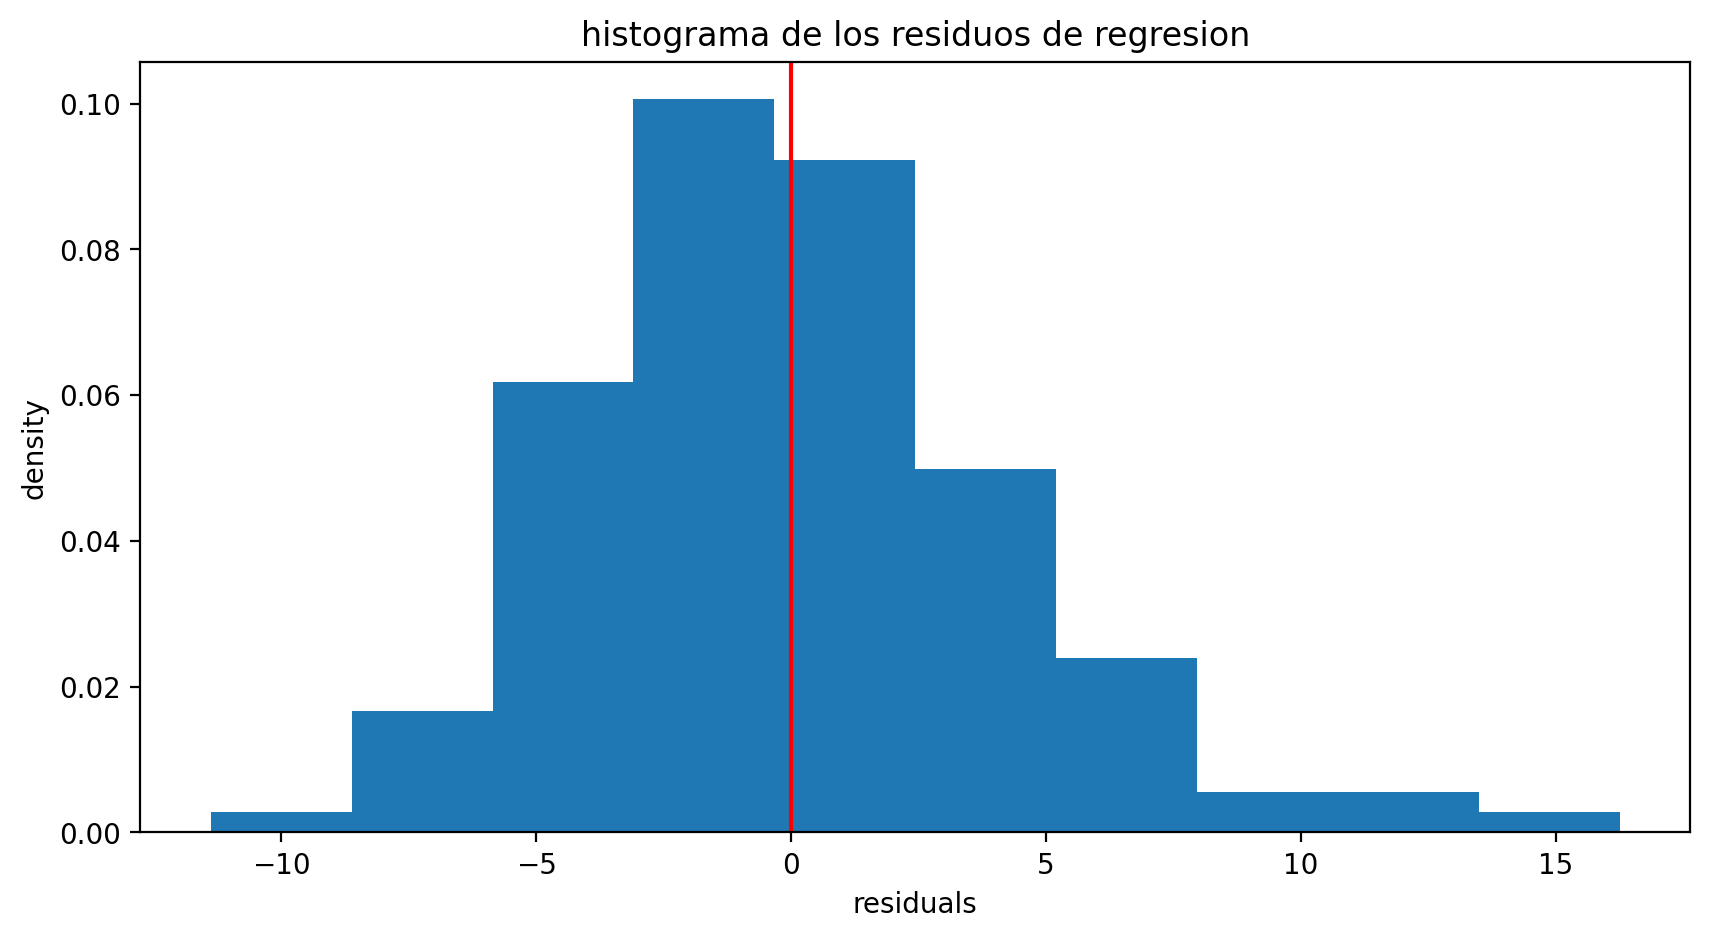

In [ ]:
residuals = Y - X @ B_hat

plt.hist(residuals, density=True, bins=10)
plt.axvline(residuals.mean(), color="red")
plt.title("histograma de los residuos de regresion")
plt.xlabel("residuals")
plt.ylabel("density")
plt.show()

# OBS: Residuos parecen tener una distribucion normal, con media cero.

### Forward selection

El proceso de forward selection consiste en realizar el modelo de regresion lineal sin ninguna variable independiente, y luego ir agregando una a una las variables independientes, de manera que en cada paso se elige la variable que mas disminuye/aumenta score del modelo. Se repite este proceso hasta que no se pueda mejorar el score del modelo.

Estadistico de mallow:  $ C_p = \frac{1}{n}(RSS+2p\hat{\sigma}^2) $

con $RSS$ la suma cuadratica de los residuos en el set de entrenamiento. $p$ la cantidad de variables independientes en el modelo y $\hat{\sigma}^2$ la varianza de los residuos estimada en un modelo con todas las variables.

src: https://en.wikipedia.org/wiki/Mallows%27s_Cp

In [ ]:
var_mallow = residuals.var()
n = len(Y)
print(
    f"Cp Mallows para modelo completo: {(1/n)*((residuals**2).sum()+2*4*var_mallow):.3f}"
)

Cp Mallows para modelo completo: 18.168


In [ ]:
# modelo base sin predictores
B_hat_base = np.mean(Y)
residuals_base = Y - B_hat_base

print(
    f"Cp Mallows para modelo base: {(1/n)*((residuals_base**2).sum()+2*0*var_mallow):.3f}"
)

Cp Mallows para modelo base: 60.763


In [ ]:
# Busco el mejor modelo de 1 variable independiente.

vars = ["displacement", "horsepower", "weight", "acceleration"]

for i, var_name in enumerate(vars):
    X = data[var_name].values
    X = np.column_stack([np.ones(len(data)), X])  # matriz de diseño
    B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # B_hat = pseudoinversa @ transpuesta @ Y

    residuals = Y - X @ B_hat
    score = (1 / n) * ((residuals**2).sum() + 2 * 1 * var_mallow)
    print(f"Cp Mallows para modelo con {var_name}: {score:.3f}")

# OBS El mejor modelo de 1 variable es con mpg ~ weight con CP_mallows = 18.767

Cp Mallows para modelo con displacement: 21.465
Cp Mallows para modelo con horsepower: 24.035
Cp Mallows para modelo con weight: 18.767
Cp Mallows para modelo con acceleration: 49.964


In [ ]:
# Busco el mejor modelo de 2 variables independientes.

vars = ["displacement", "horsepower", "acceleration"]

for i, var_name in enumerate(vars):
    X = data[var_name].values
    X = np.column_stack(
        [np.ones(len(data)), data["weight"].values, X]
    )  # matriz de diseño
    B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # B_hat = pseudoinversa @ transpuesta @ Y

    residuals = Y - X @ B_hat
    score = (1 / n) * ((residuals**2).sum() + 2 * 2 * var_mallow)
    print(f"Cp Mallows para modelo con weight y {var_name}: {score:.3f}")

# OBS: El mejor modelo de dos variables es mpg ~ weight + horsepower con CP_mallows = 18.023

Cp Mallows para modelo con weight y displacement: 18.473
Cp Mallows para modelo con weight y horsepower: 18.023
Cp Mallows para modelo con weight y acceleration: 18.429


In [ ]:
# Busco el mejor modelo de 2 variables independientes.

vars = ["displacement", "acceleration"]

for i, var_name in enumerate(vars):
    X = data[var_name].values
    X = np.column_stack(
        [np.ones(len(data)), data["weight"].values, data["horsepower"].values, X]
    )  # matriz de diseño
    B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y  # B_hat = pseudoinversa @ transpuesta @ Y

    residuals = Y - X @ B_hat
    score = (1 / n) * ((residuals**2).sum() + 2 * 3 * var_mallow)
    print(f"Cp Mallows para modelo con weight y {var_name}: {score:.3f}")

# OBS: Ambos modelos de 3 variables dan un CP_mallows major al modelo mpg ~ weight + horsepower con CP_mallows = 18.023.
# Por lo tanto el mejor modelo es mpg ~ weight + horsepower.

Cp Mallows para modelo con weight y displacement: 18.079
Cp Mallows para modelo con weight y acceleration: 18.114


### Regularizacion

In [ ]:
Y = data["mpg"].values
X = data.drop("mpg", axis=1)
X = (X - X.mean()) / X.std()  # normalizo las variables independientes

X = np.column_stack([np.ones(len(data)), X])  # matriz de diseño

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

En la regresion de ridge

$ \hat{B}_R = (X^TX+\lambda I)^{-1}X^TY $

In [ ]:
# Regresion de ridge
# Primero escribo los coeficientes de la regresion de ridge en funcion de lambda. Despues usando los datos de validacion busco lambda tal que se minimice el MSE.


def ridge_coef(lamda):
    return (
        np.linalg.inv(X_train.T @ X_train + lamda * np.eye(X_train.shape[1]))
        @ X_train.T
        @ Y_train
    )

best lambda: 15.10 with MSE = 16.90


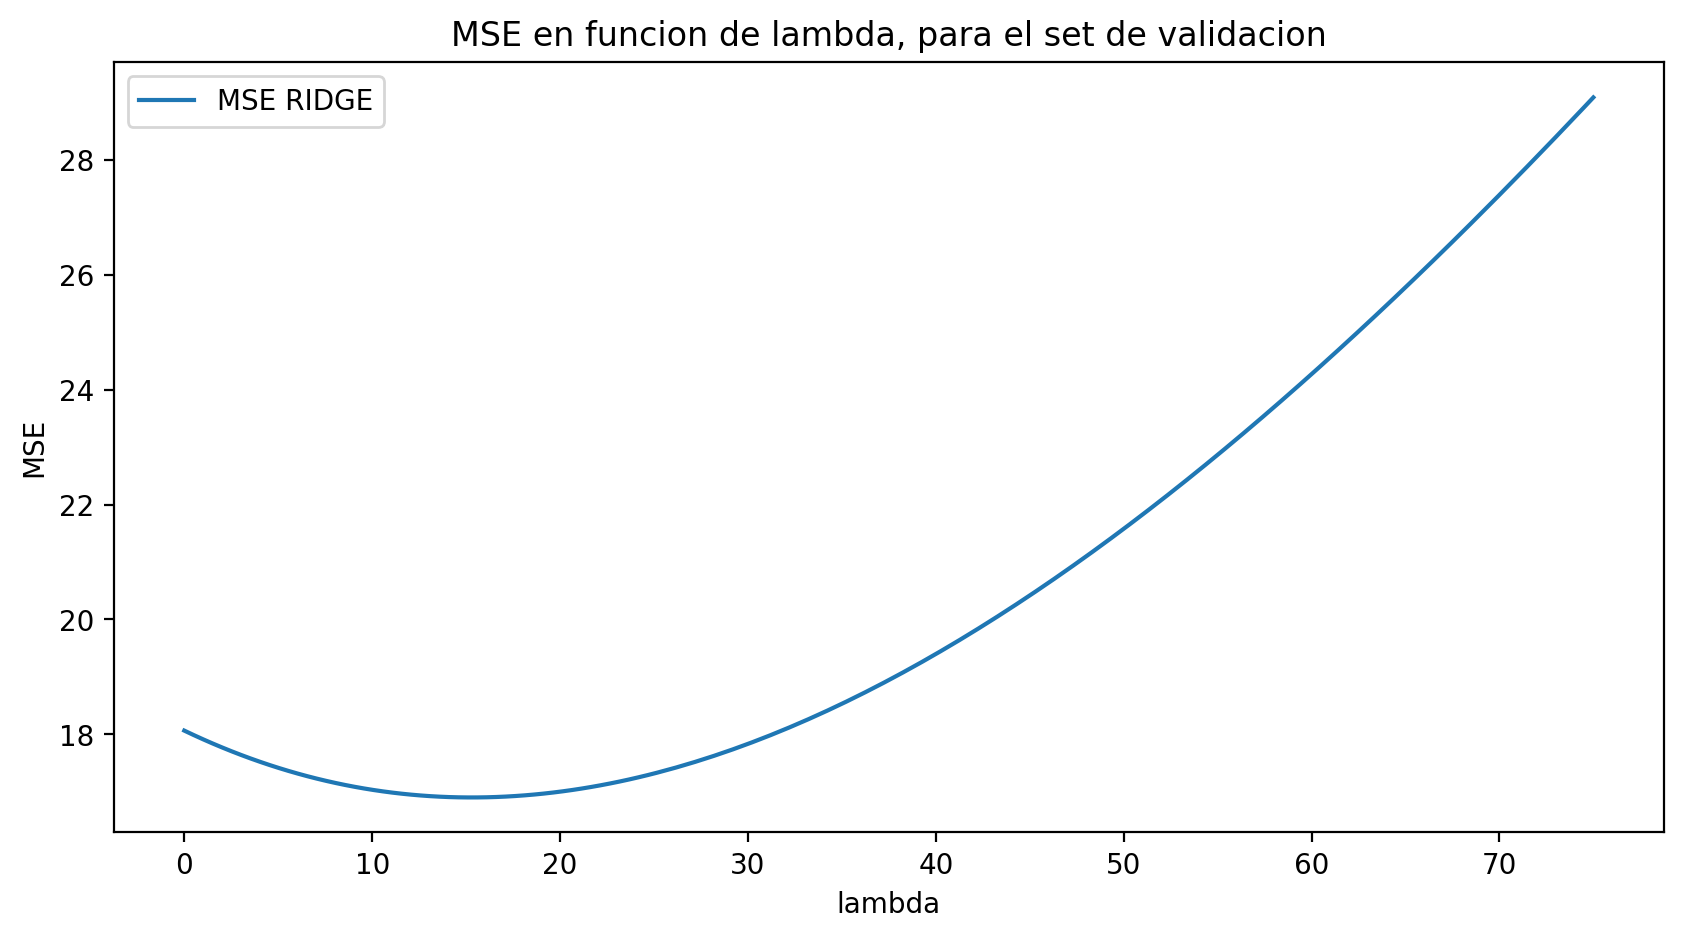

In [ ]:
def test_mse(coeffs):
    return ((Y_test - X_test @ coeffs).T @ (Y_test - X_test @ coeffs)) / len(Y_test)


lambdas = np.linspace(0, 75, 150)
test_mse_values = np.array([test_mse(ridge_coef(lamda)) for lamda in lambdas])
plt.plot(lambdas, test_mse_values, label="MSE RIDGE")
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE en funcion de lambda, para el set de validacion")
plt.legend()

print(
    f"best lambda: {lambdas[test_mse_values.argmin()]:.2f} with MSE = {test_mse_values.min():.2f}"
)

En la regresion de lasso

$ \beta_j $ tal que se minimice $  (\sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| ) $  para un dado valor de $\lambda$

No tengo una forma cerrada para los coeficientes, uso un metodo numerico para buscar los coeficientes.

El plan:
1)  Elijo un valor de lambda
2) Calculo los coeficientes que minimizan la expresion para los valores de X_train, Y_train
3) Calculo MSE para esos coeficientes con los valores de X_test, Y_test
4) repito para cada valor de lamda y busco el minimo en la curva mse vs lambda

In [ ]:
def min_target(coeffs, X_train, Y_train, lamb):

    B0 = coeffs[0]
    B = coeffs[1:]
    residuals = Y_train - B0 - X_train[:, 1:] @ B

    RSS = (residuals**2).sum()
    L1 = lamb * (np.abs(coeffs).sum())
    return RSS + L1

In [ ]:
X0 = (
    np.linalg.inv(X_train.T @ X_train) @ X_train.T @ Y_train
)  # OLS betas para punto inicial del optimizador

In [ ]:
from scipy.optimize import minimize

N = 1200
lambdas = np.linspace(0, 1500, N)
test_mse_values = np.zeros(N)

for i, lamb in enumerate(lambdas):
    res = minimize(lambda x: min_target(x, X_train, Y_train, lamb), x0=X0)
    coeffs = res.x
    test_mse_values[i] = test_mse(coeffs)

best lambda: 510.43 with MSE = 15.49


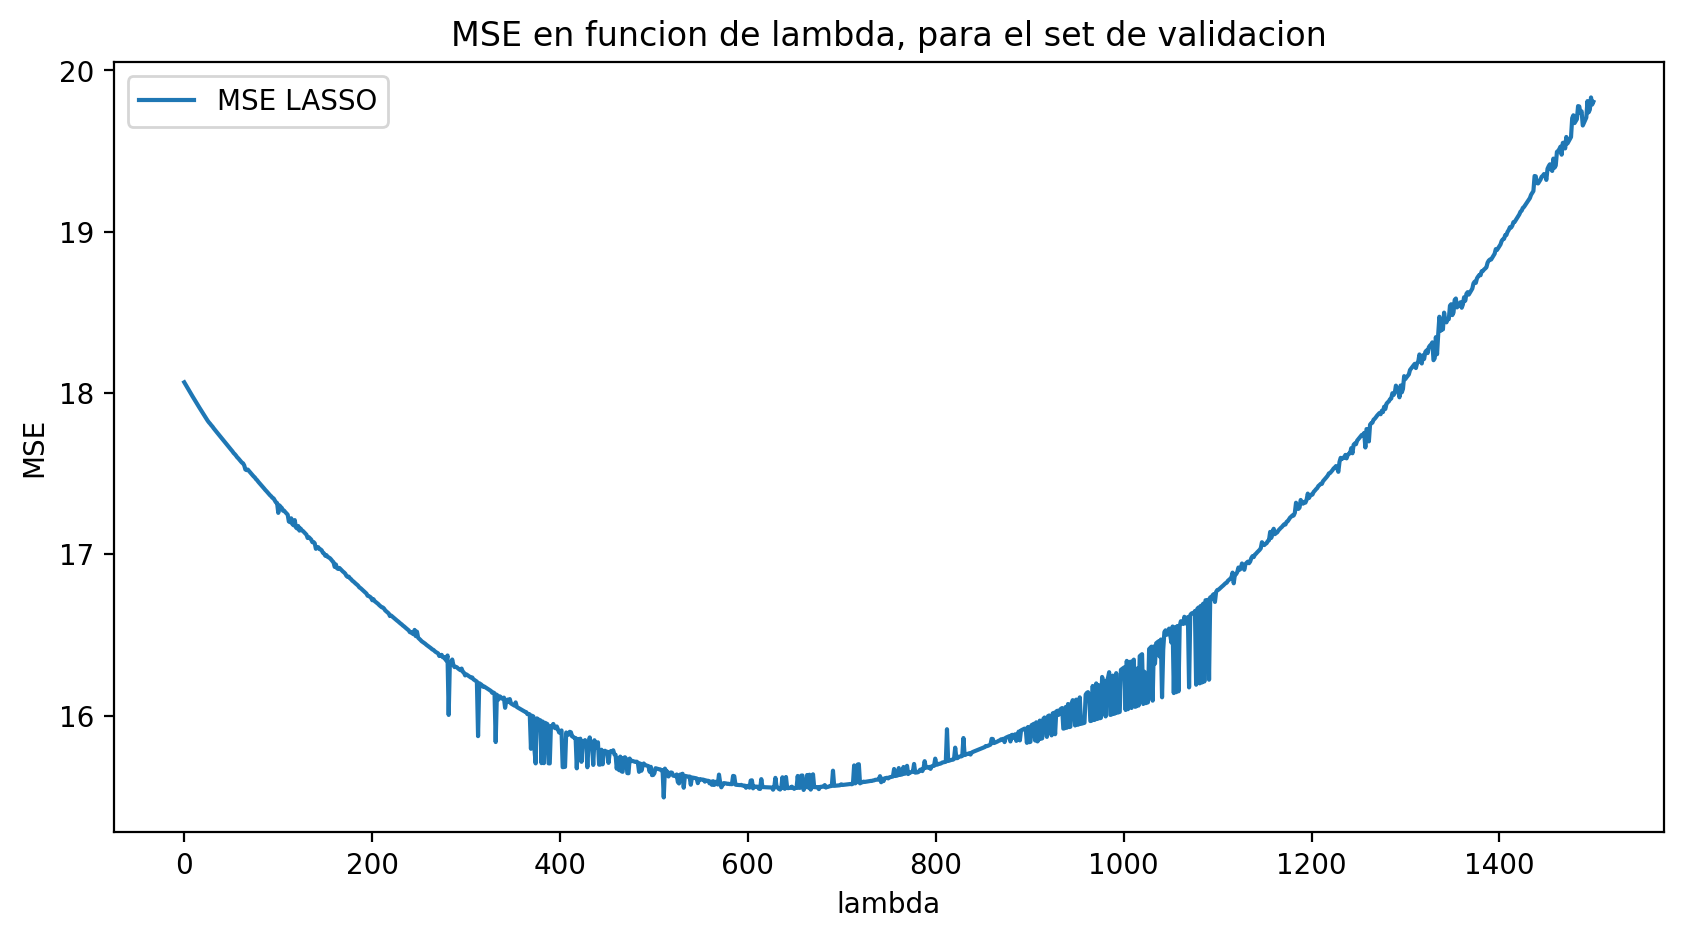

In [ ]:
plt.plot(lambdas, test_mse_values, label="MSE LASSO")
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.title("MSE en funcion de lambda, para el set de validacion")
plt.legend()

print(
    f"best lambda: {lambdas[test_mse_values.argmin()]:.2f} with MSE = {test_mse_values.min():.2f}"
)

# Tanto para ridge como para lasso el MSE ~ 16.